<a href="https://colab.research.google.com/github/lililibin2022/TransferLearning/blob/main/YOLOv8-classify-fermenterwindowdashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Wed Dec 27 12:31:16 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.5 MB/s eta 0:00:00


## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 395, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

## Train YOLOv8 Model on Custom Dataset

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KambJHvvNRVwsQ1xhopi")
project = rf.workspace("fafu").project("fermenter-window-dashboard")
dataset = project.version(1).download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fermenter-window-dashboard-1 in folder:: 100%|██████████| 257/257 [00:00<00:00, 3781.06it/s]


In [19]:


# Load a model
model = YOLO('yolov8m-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8m-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8m-cls.yaml').load('yolov8m-cls.pt')  # build from YAML and transfer weights

# Train the model
model = YOLO("yolov8n-cls.pt")

model.train(data="/content/fermenter-window-dashboard-1", epochs=300)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   2655744  ultralytics.nn.modules.conv.Conv             [384

train: Scanning /content/fermenter-window-dashboard-1/train... 189 images, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]

albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)



val: Scanning /content/fermenter-window-dashboard-1/test... 18 images, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
300 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/300      1.14G      1.018         13        224: 100%|██████████| 12/12 [00:01<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.18it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


      2/300     0.598G     0.5475         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.35it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      3/300     0.598G     0.2299         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.45it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      4/300     0.585G    0.08636         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      5/300     0.585G    0.05106         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.37it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      6/300     0.585G    0.04421         13        224: 100%|██████████| 12/12 [00:01<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      7/300     0.585G    0.01566         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.98it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      8/300     0.585G    0.01825         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.82it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      9/300     0.585G     0.0185         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.87it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     10/300     0.585G    0.01486         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 84.74it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     11/300     0.585G    0.01063         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.86it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     12/300     0.583G    0.01064         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.54it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     13/300     0.585G   0.008695         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.24it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     14/300     0.585G   0.004349         13        224: 100%|██████████| 12/12 [00:01<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.72it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     15/300     0.585G    0.05557         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.77it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     16/300     0.585G   0.002526         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.36it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     17/300     0.585G    0.03907         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.05it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     18/300     0.585G    0.01899         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 42.66it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     19/300     0.585G    0.01466         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.85it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     20/300     0.585G   0.008046         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.02it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     21/300     0.585G   0.007357         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.57it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     22/300     0.585G    0.05344         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.18it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     23/300     0.585G   0.008243         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.31it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     24/300     0.585G   0.009358         13        224: 100%|██████████| 12/12 [00:01<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.30it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     25/300     0.585G   0.006197         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.35it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     26/300     0.585G   0.007434         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.63it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     27/300     0.585G    0.00536         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.49it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     28/300     0.585G    0.00287         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.92it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     29/300     0.585G   0.003914         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.37it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     30/300     0.585G  0.0008074         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.87it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     31/300     0.585G   0.003303         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.27it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     32/300     0.585G   0.002735         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.98it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     33/300     0.585G    0.01903         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.88it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     34/300     0.585G   0.001785         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.47it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     35/300     0.585G     0.0258         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.36it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     36/300     0.585G   0.002243         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.31it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     37/300     0.585G   0.001283         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.32it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     38/300     0.585G   0.002615         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.04it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     39/300     0.585G   0.004415         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.15it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     40/300     0.585G   0.001057         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.69it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     41/300     0.585G   0.001312         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.72it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     42/300     0.585G   0.005353         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.48it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     43/300     0.585G   0.001776         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.96it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     44/300     0.585G   0.001966         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.63it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     45/300     0.585G   0.002343         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.27it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     46/300     0.585G  0.0006339         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.90it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     47/300     0.585G  0.0003117         13        224: 100%|██████████| 12/12 [00:00<00:00, 12.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.31it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     48/300     0.585G  0.0004113         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.80it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     49/300     0.585G  0.0003075         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     50/300     0.585G   0.000533         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.17it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     51/300     0.585G   0.009885         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.79it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     52/300     0.585G  0.0002851         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.10it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     53/300     0.585G    0.02143         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.64it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     54/300     0.585G  0.0004333         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.00it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     55/300     0.583G  0.0001141         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 42.02it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     56/300     0.585G    0.01969         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 72.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     57/300     0.585G   0.007972         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.74it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     58/300     0.585G   0.001656         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.36it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     59/300     0.585G   0.004086         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.82it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     60/300     0.585G   0.002949         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.96it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     61/300     0.585G   0.003886         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.46it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     62/300     0.585G   0.006281         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.05it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     63/300     0.585G   0.001476         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.94it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     64/300     0.585G   0.003314         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.48it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     65/300     0.585G   0.004701         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.56it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     66/300     0.585G    0.03452         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.53it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     67/300     0.585G     0.0057         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.15it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     68/300     0.585G   0.002383         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.99it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     69/300     0.585G   0.004426         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.55it/s]


                   all      0.889          1

      Epoch    GPU_mem       loss  Instances       Size


     70/300     0.585G      0.029         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.38it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     71/300     0.585G  0.0007303         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.93it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     72/300     0.585G   0.004561         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.82it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     73/300     0.585G    0.00112         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.29it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     74/300     0.585G     0.0108         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 85.48it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     75/300     0.585G  0.0008764         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     76/300     0.585G  0.0009189         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.39it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     77/300     0.585G  0.0005428         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.73it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     78/300     0.585G  0.0008492         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.95it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     79/300     0.585G   0.000392         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.28it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     80/300     0.585G   0.002694         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.79it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     81/300     0.585G  0.0002402         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.72it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     82/300     0.585G  0.0003169         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.06it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     83/300     0.585G  0.0008037         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.52it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     84/300     0.585G   0.001271         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.24it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     85/300     0.585G   0.001775         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.74it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     86/300     0.585G  0.0003709         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.25it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     87/300     0.585G  0.0008606         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.22it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     88/300     0.585G  0.0005172         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     89/300     0.585G  0.0008273         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.65it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     90/300     0.585G  0.0007302         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.95it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     91/300     0.585G  0.0007689         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.91it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     92/300     0.585G  0.0001926         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.08it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     93/300     0.585G    0.00111         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.04it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     94/300     0.583G  0.0003511         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.52it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     95/300     0.585G  0.0001179         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.81it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     96/300     0.585G  0.0001525         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.06it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     97/300     0.585G  0.0005188         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.67it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     98/300     0.585G   0.001791         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.60it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     99/300     0.585G  0.0002298         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.96it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    100/300     0.585G  0.0003875         13        224: 100%|██████████| 12/12 [00:01<00:00, 11.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.80it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    101/300     0.585G  0.0002089         13        224: 100%|██████████| 12/12 [00:01<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.21it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    102/300     0.585G  5.906e-05         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.69it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    103/300     0.585G  0.0006202         13        224: 100%|██████████| 12/12 [00:01<00:00,  9.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.48it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    104/300     0.585G  0.0001188         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.25it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    105/300     0.585G  6.289e-05         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.56it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    106/300     0.585G   0.003406         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.92it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


    107/300     0.585G  0.0007899         13        224: 100%|██████████| 12/12 [00:01<00:00, 10.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.08it/s]

                   all      0.944          1
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 57, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



107 epochs completed in 0.055 hours.
Optimizer stripped from runs/classify/train11/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train11/weights/best.pt, 3.0MB

Validating runs/classify/train11/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/fermenter-window-dashboard-1/train... found 189 images in 3 classes ✅ 
val: None...
test: /content/fermenter-window-dashboard-1/test... found 18 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.49it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train11
Results saved to runs/classify/train11


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ce104bf2f80>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train11')
speed: {'preprocess': 0.13430913289388022, 'inference': 0.6169743008083768, 'loss': 0.00095367431640625, 'postprocess': 0.0008742014567057291}
task: 'classify'
top1: 1.0
top5: 1.0

In [20]:
metrics = model.val()

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/fermenter-window-dashboard-1/train... found 189 images in 3 classes ✅ 
val: None...
test: /content/fermenter-window-dashboard-1/test... found 18 images in 3 classes ✅ 


TypeError: ignored

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KambJHvvNRVwsQ1xhopi")
project = rf.workspace("fafu").project("fermenter_object_detection")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to fermenter_object_detection-1 in yolov8:: 100%|██████████| 896/896 [00:00<00:00, 4716.17it/s]


In [17]:
!yolo task=classify mode=train model=yolov8m-cls.pt data={dataset.location}/data.yaml epochs=200 imgsz=640

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/fermenter-window-dashboard-1/data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [15]:
Image(filename=f'/content/runs/detect/train8/confusion_matrix.png', width=600)

FileNotFoundError: ignored

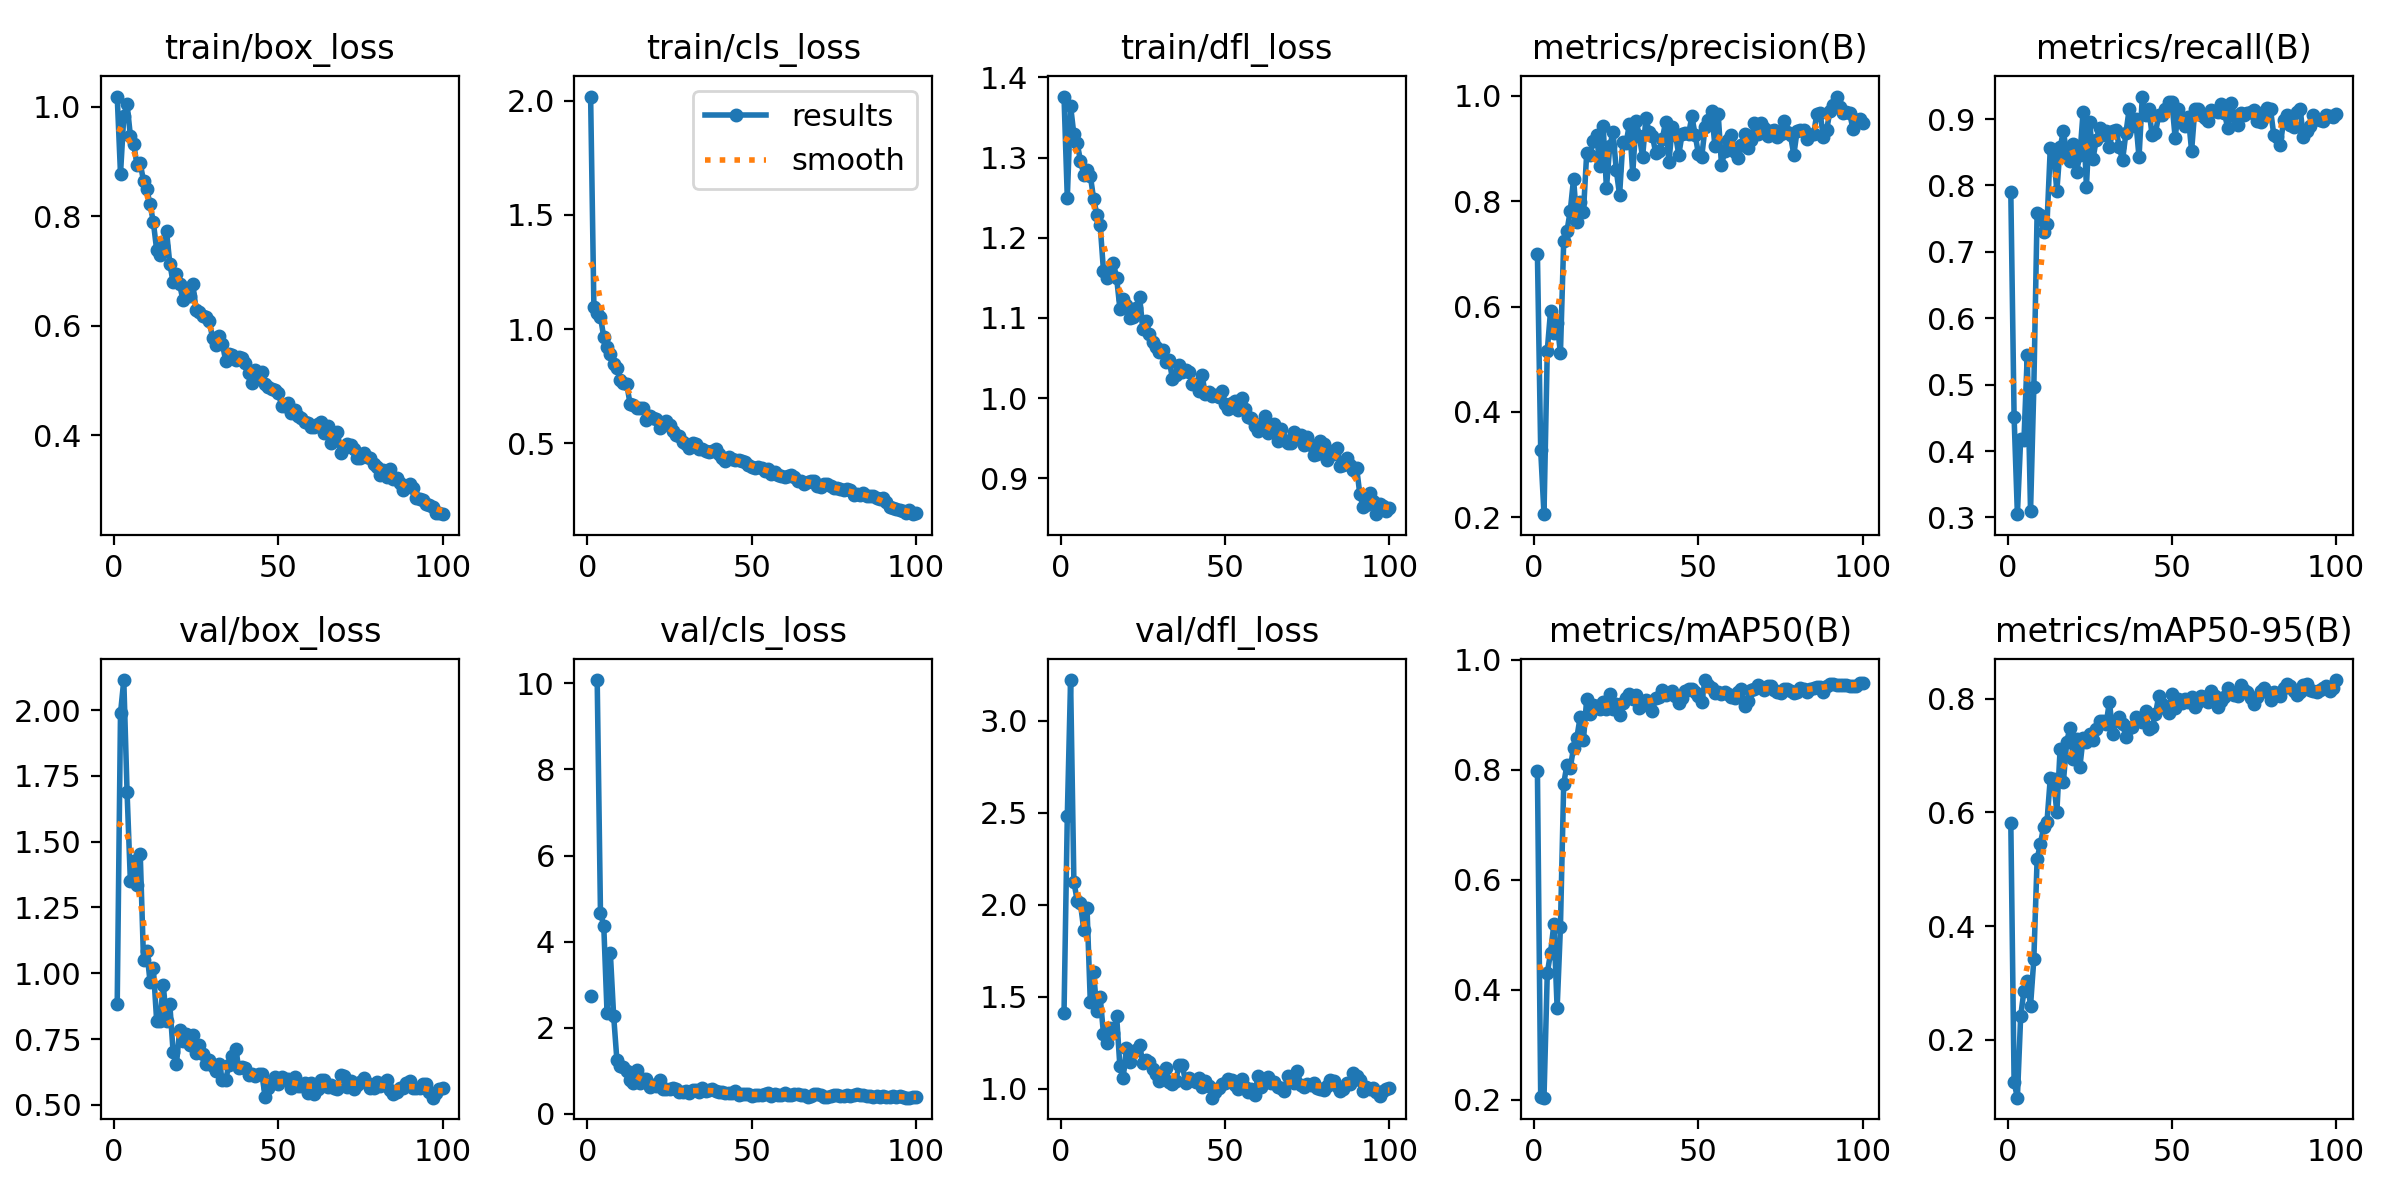

In [ ]:
Image(filename=f'/content/runs/detect/train8/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients
val: Scanning /content/Cup-Detection-v2-3/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.93it/s]
                   all         19         71      0.937      0.797      0.805      0.537
             Cocio Cup         19         16      0.998          1      0.995       0.72
                   Cup         19         11      0.879      0.818      0.891      0.596
         Halloween cup         19         14      0.881          1      0.962      0.529
      Hand painted cup         19         15      0.865          1      0.988      0.723
             White Cup         19         14          1      0.963      0.995      0.655
                   cup         19          1          1   

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train9/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/18 /content/fermenter_object_detection-1/test/images/IMG_6321_JPG.rf.2b498f486c32d833fb8fc9ff3fc1ae89.jpg: 640x640 2 Fermenters, 2 Windows, 37.1ms
image 2/18 /content/fermenter_object_detection-1/test/images/IMG_6324_JPG.rf.9b2df86e00a8f10b781df828a0bf80b8.jpg: 640x640 1 dashboard, 37.1ms
image 3/18 /content/fermenter_object_detection-1/test/images/IMG_6333_MOV-0_jpg.rf.b20e344166d5eb4522c63efcbe0066e1.jpg: 640x640 2 Fermenters, 1 Window, 1 dashboard, 37.0ms
image 4/18 /content/fermenter_object_detection-1/test/images/IMG_6333_MOV-18_jpg.rf.e5ea26c42db81d0b150cad5cd78ca132.jpg: 640x640 1 Fermenter, 2 Windows, 37.0ms
image 5/18 /content/fermenter_object_detection-1/test/images/IMG_6333_MOV-30_jpg.rf.b671e2b28e80de97cf18a73aac8bc98e.jpg: 640x640 1 Fermenter, 2 Windows, 37

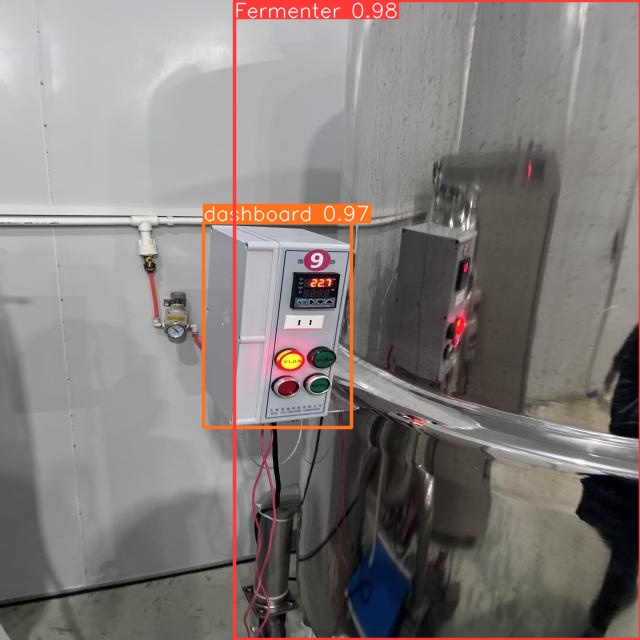

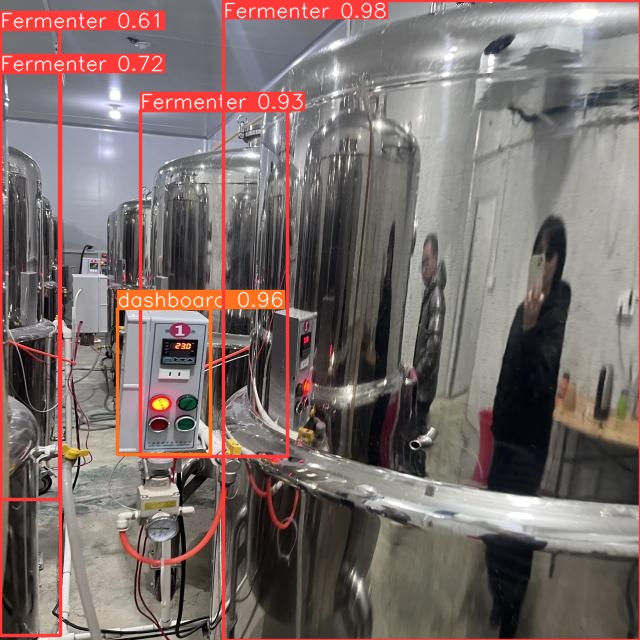

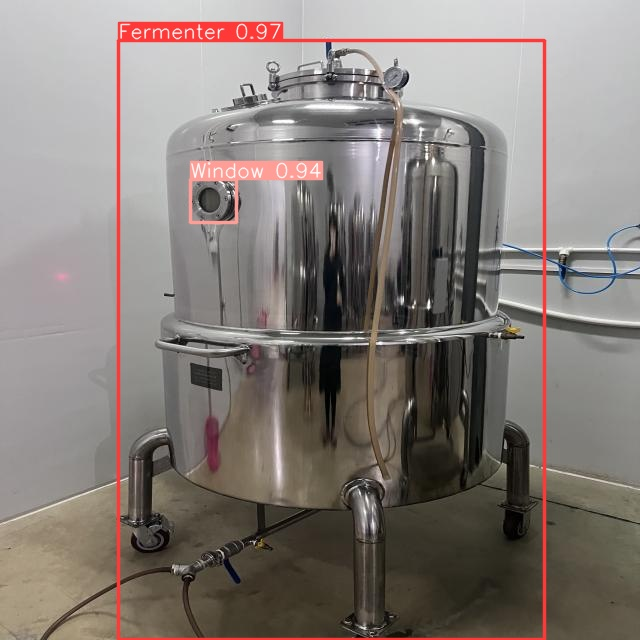

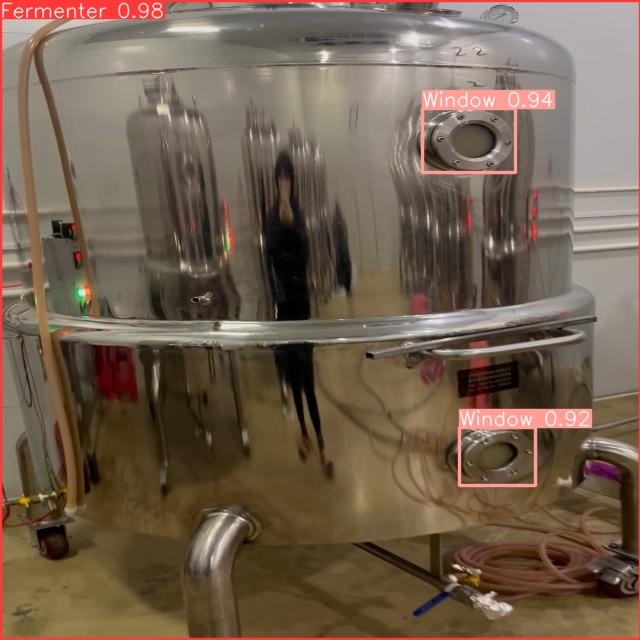

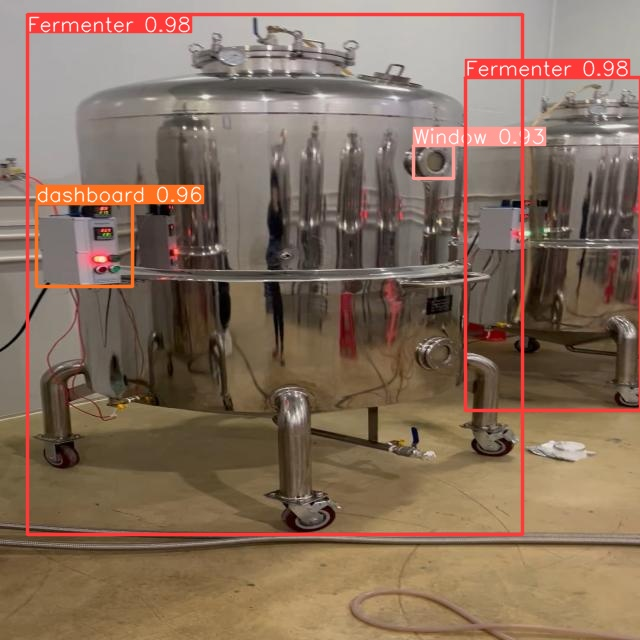

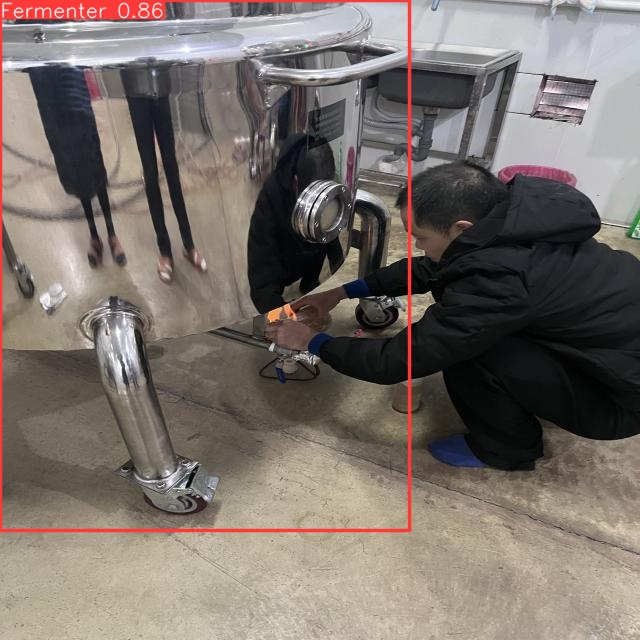

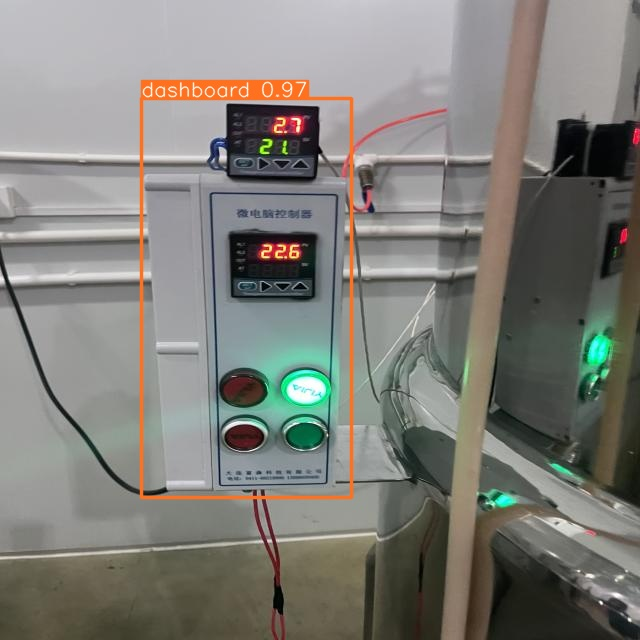

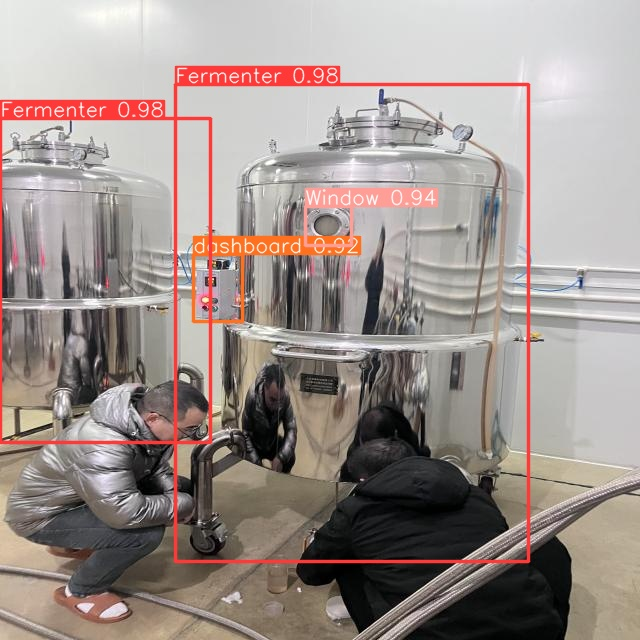

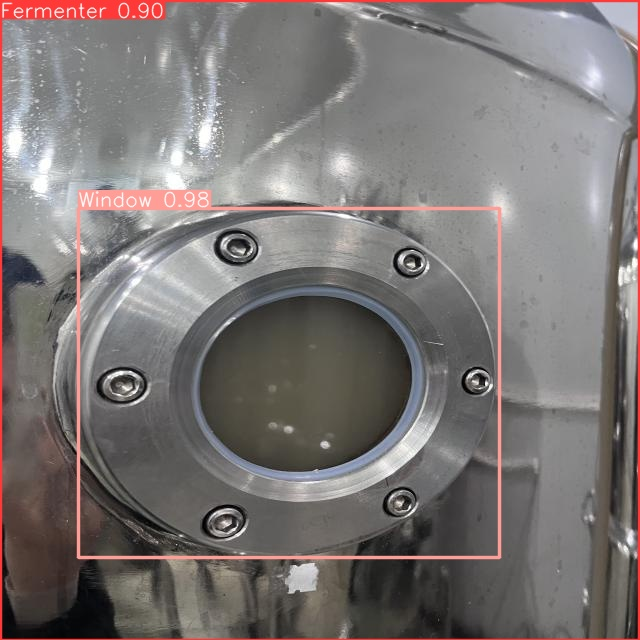

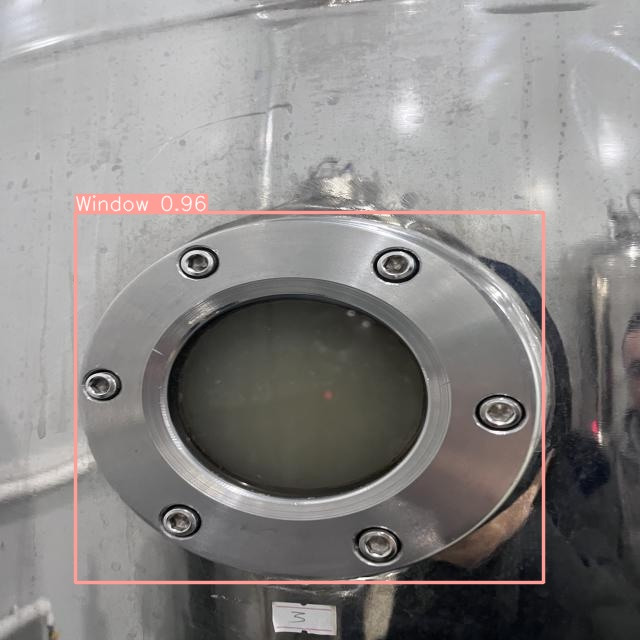

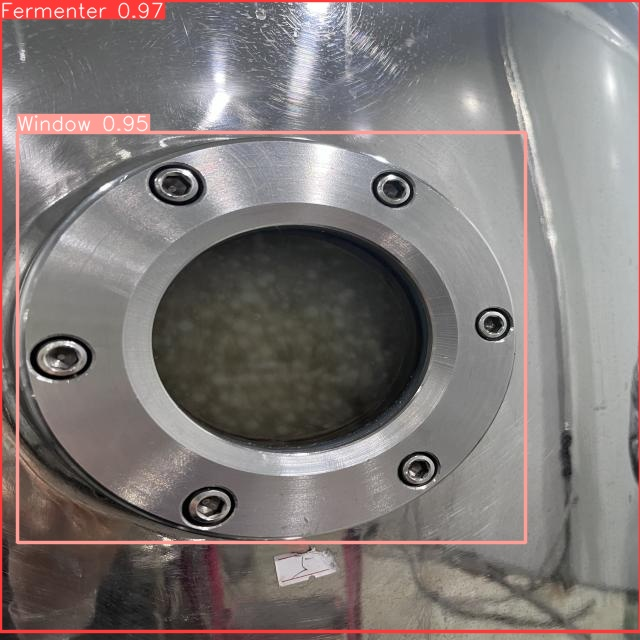

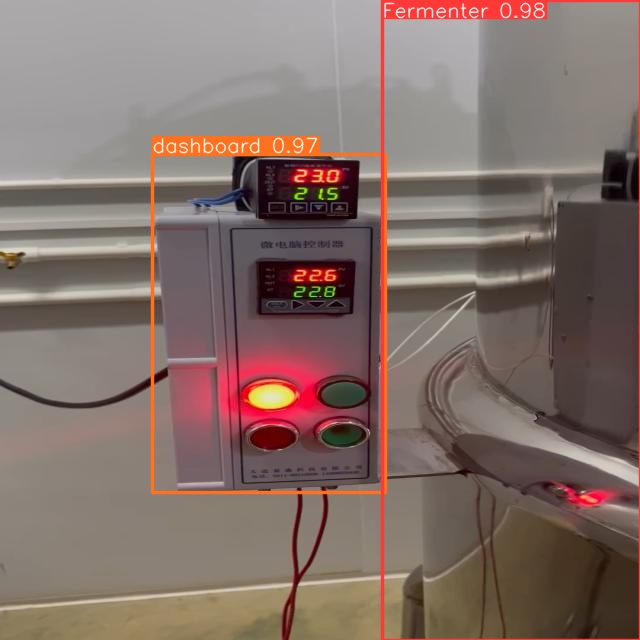

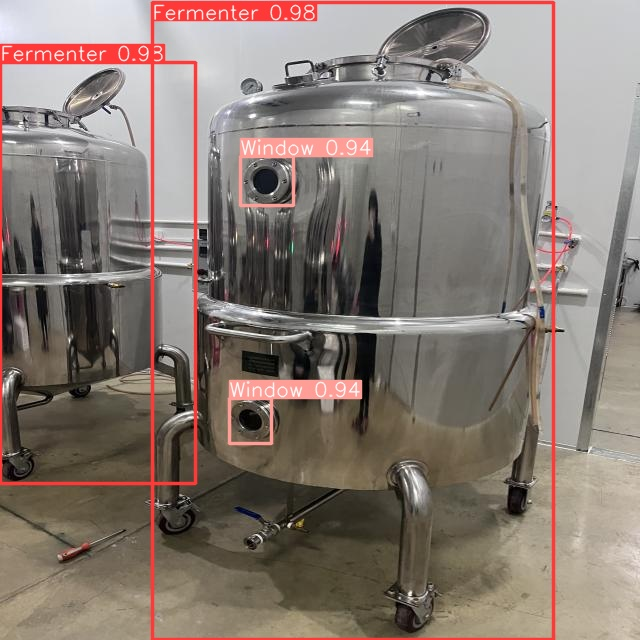

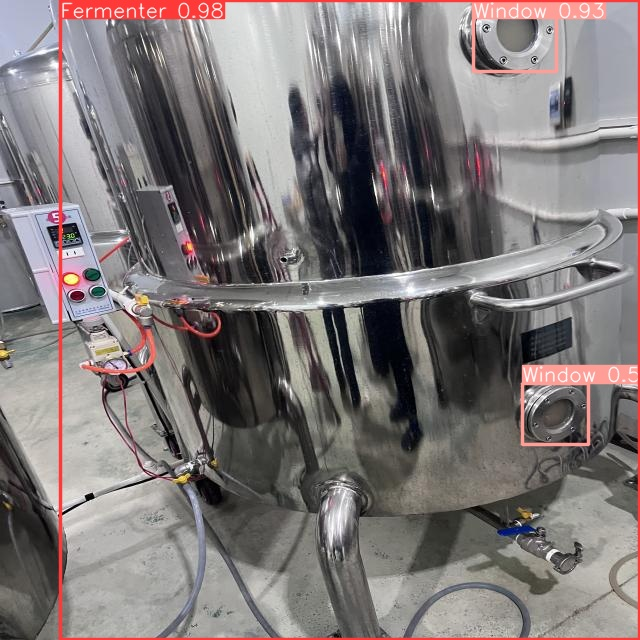

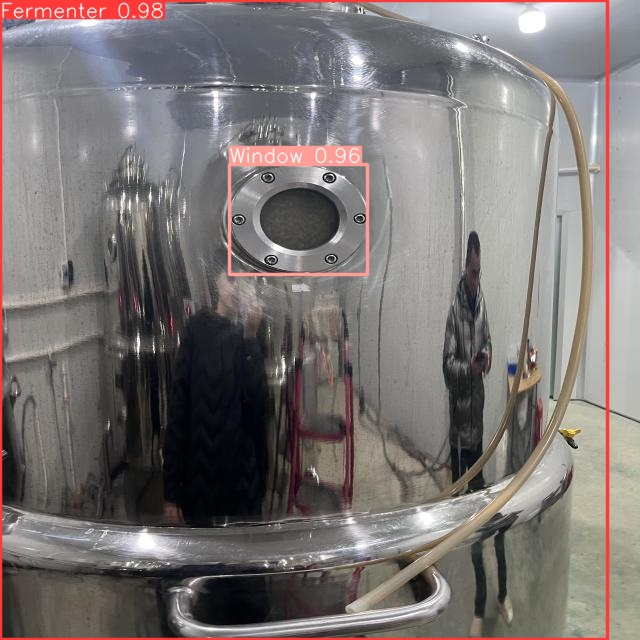

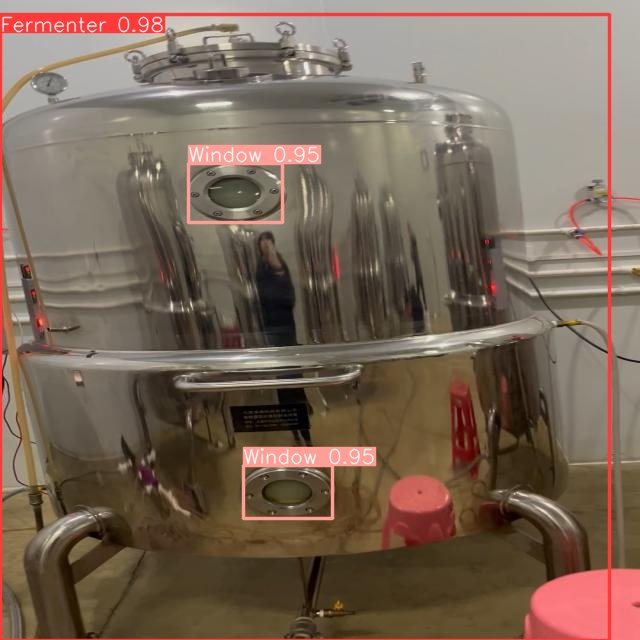

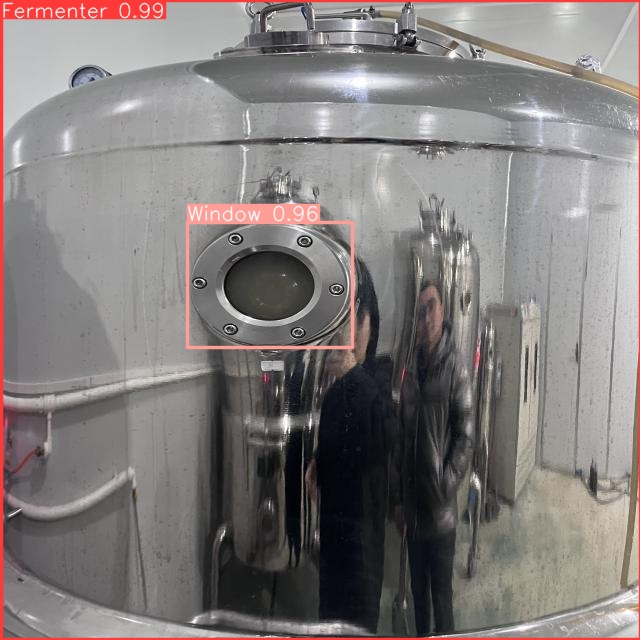

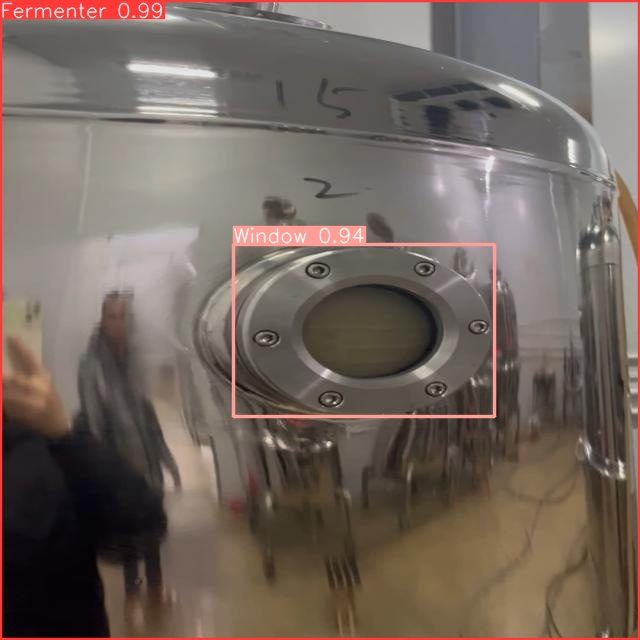

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import shutil
import os

source_directory = '/content/runs/detect'
destination_directory = '/content/gdrive/MyDrive/Fermenterwindowdashr/train'  # Use the existing directory as the parent

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Copy the contents of the source directory into the destination directory
for item in os.listdir(source_directory):
    source_item = os.path.join(source_directory, item)
    destination_item = os.path.join(destination_directory, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)